# Introduction to Data Science
## Lab 2: Data import and linear regression

This course assumes that you are comfortable with the basic functions of Jupyter and Python.

### Part A: Introduction Data Import

Download the file `Advertising.csv` from the homepage’s exercise section and upload it to your Jupyter Hub folder.
Take a short look at the `csv`-file using a spreadsheet, e.g., LibreOffice.
The file contains information about the sales of products in different markets, along with advertising budgets in the three media: **TV**, **radio** and **newspaper**.

**Task**: Import the `csv`-file using the `numpy` function `genfromtxt` and store it as an array `X`.

In [1]:
import numpy as np

# YOUR CODE HERE
X = np.genfromtxt('Advertising.csv', 
                  delimiter = ',',
                  skip_header=1)

In [2]:
X

array([[  1. , 230.1,  37.8,  69.2,  22.1],
       [  2. ,  44.5,  39.3,  45.1,  10.4],
       [  3. ,  17.2,  45.9,  69.3,   9.3],
       [  4. , 151.5,  41.3,  58.5,  18.5],
       [  5. , 180.8,  10.8,  58.4,  12.9],
       [  6. ,   8.7,  48.9,  75. ,   7.2],
       [  7. ,  57.5,  32.8,  23.5,  11.8],
       [  8. , 120.2,  19.6,  11.6,  13.2],
       [  9. ,   8.6,   2.1,   1. ,   4.8],
       [ 10. , 199.8,   2.6,  21.2,  10.6],
       [ 11. ,  66.1,   5.8,  24.2,   8.6],
       [ 12. , 214.7,  24. ,   4. ,  17.4],
       [ 13. ,  23.8,  35.1,  65.9,   9.2],
       [ 14. ,  97.5,   7.6,   7.2,   9.7],
       [ 15. , 204.1,  32.9,  46. ,  19. ],
       [ 16. , 195.4,  47.7,  52.9,  22.4],
       [ 17. ,  67.8,  36.6, 114. ,  12.5],
       [ 18. , 281.4,  39.6,  55.8,  24.4],
       [ 19. ,  69.2,  20.5,  18.3,  11.3],
       [ 20. , 147.3,  23.9,  19.1,  14.6],
       [ 21. , 218.4,  27.7,  53.4,  18. ],
       [ 22. , 237.4,   5.1,  23.5,  12.5],
       [ 23. ,  13.2,  15.9,  49

In [3]:
assert X.shape == (200,5)
assert X[34][1] == 95.7

**Task**: Extract the columns from the array `X` and store them as 1-dimensional arrays `idx`, `tv`, `radio`, `newspaper` and `sales`, e.g.,
    
    idx = X[:, 0]

In [4]:
# YOUR CODE HERE
idx = X[:, 0]
tv = X[:, 1]
radio = X[:, 2]
newspaper = X[:, 3]
sales = X[:, 4]

In [5]:
assert idx.ndim == 1
assert tv.ndim == 1
assert radio.ndim == 1
assert newspaper.ndim == 1
assert sales.ndim == 1
i=27
assert idx[i] == 28
assert tv[i] == 240.1
assert radio[i] == 16.7
assert newspaper[i] == 22.9
assert sales[i] == 15.9

**Task**: Add subplots to plot sales against radio as well as sales against newspaper.

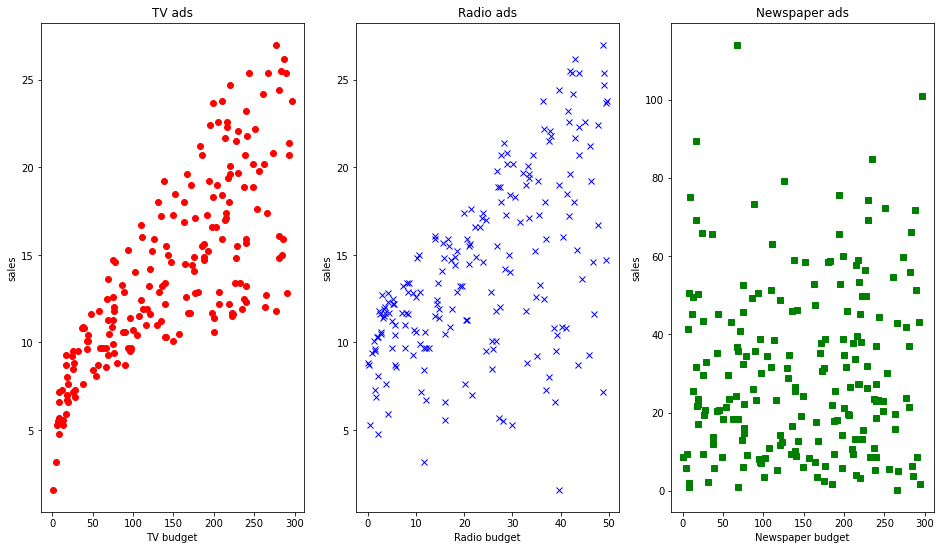

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
fig1 = plt.figure()
fig1.add_subplot(1,3,1)
plt.plot(tv, sales, 'ro')
plt.xlabel('TV budget')
plt.ylabel('sales')
plt.title('TV ads')

fig1.add_subplot(1,3,2)
# TASK: Plot sales against radio
plt.plot(radio, sales, 'bx')
plt.xlabel('Radio budget')
plt.ylabel('sales')
plt.title('Radio ads')

fig1.add_subplot(1,3,3)
# TASK: Plot sales against newspaper
plt.plot(tv, newspaper, 'gs')
plt.xlabel('Newspaper budget')
plt.ylabel('sales')
plt.title('Newspaper ads')

plt.show()

### Part B: Creation of a function in Python
The mean squared errer, short **MSE**, is one of the most important performance indicators for the quality of data fitting.
The goal of this exercise is to implement the function `computeMSE` with the following **input**:
- the observations $y_i \in Y$, $i = 1, \ldots, N$ that belong to measurements $x_i \in X$, $i = 1, \ldots, N$
- the predictions of $f(x_i)$, which are denoted by $\hat f(x_i)$, $i = 1, \ldots, N$

and corresponding **output**:

$$
    MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat f (x_i))^2
$$

In [7]:
import numpy as np

# Define function for mean squared error
def computeMSE(y, fhatx):
    N = len(y)
    if N == len(fhatx):
        mse = ((y-fhatx)**2).sum()/N
        return mse
    else:
        return f'The length of arrays are diffrence: {N}!={len(fhatx)}'

In [8]:
x = np.array([0.55, 0.72, 0.6 , 0.54, 0.42,
    0.65, 0.44, 0.89, 0.96, 0.38,
    0.79, 0.53, 0.57, 0.93, 0.07,
    0.09, 0.02, 0.83, 0.78, 0.87])

y = np.array([6.9 , 7.58, 7.03, 6.61, 5.84,
    7.32, 6.29, 8.38, 9.03, 5.75,
    7.95, 6.63, 7.  , 8.8 , 4.37,
    4.49, 4.01, 7.95, 7.87, 8.37])

fhatx = np.array([
       6.74792024, 7.61454115, 7.00280875, 6.69694254, 6.08521014,
       7.25769725, 6.18716554, 8.48116205, 8.83800595, 5.88129934,
       7.97138505, 6.64596484, 6.84987564, 8.68507285, 4.30099064,
       4.40294604, 4.04610214, 8.17529585, 7.92040735, 8.37920665])

print('MSE: ', computeMSE(y, fhatx))

assert np.abs(computeMSE(y, fhatx) - 0.01375124894963537) < 1e-9

MSE:  0.01375124894963537


**Task**: Compute the linear regression coefficients $\beta_0, \beta_1 \in \mathbb{R}$ with the `numpy` function `np.polyfit`.
Remember, linear regression finds the values $\beta_0, \beta_1 \in \mathbb{R}$ which solve the minimization problem

$$
\text{Minimize } \frac{1}{N} \sum_{i=1}^N \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2 \text{ over } \beta_0, \beta_1 \in \mathbb{R}
$$

*Hint*: Again, use the question mark `?` to get help and have a look at the documentation.

In [9]:
beta = np.polyfit(x, y, 1)
beta

array([5.09777001, 3.94414674])

In [10]:
assert np.abs(beta[0] - 5.09777001) < 1e-8
assert np.abs(beta[1] - 3.94414674) < 1e-8

**Task**: Compute the prediction of `x` by yourself and store it in a variable `z`.
The values should coincide with those of the variable `fhatx` (by at most `1e-8`). You can use the function `np.polyval`.

In [11]:
# YOUR CODE HERE
z = np.polyval(beta,x)
z

array([6.74792024, 7.61454115, 7.00280875, 6.69694254, 6.08521014,
       7.25769725, 6.18716554, 8.48116205, 8.83800595, 5.88129934,
       7.97138505, 6.64596484, 6.84987564, 8.68507285, 4.30099064,
       4.40294604, 4.04610214, 8.17529585, 7.92040735, 8.37920665])

In [12]:
assert np.max(np.abs(fhatx - z)) < 1e-8

**Task**: Plot the data points $(x_i, y_i)$, $i = 1 \ldots, N$ together with the least squares line aka regression line.

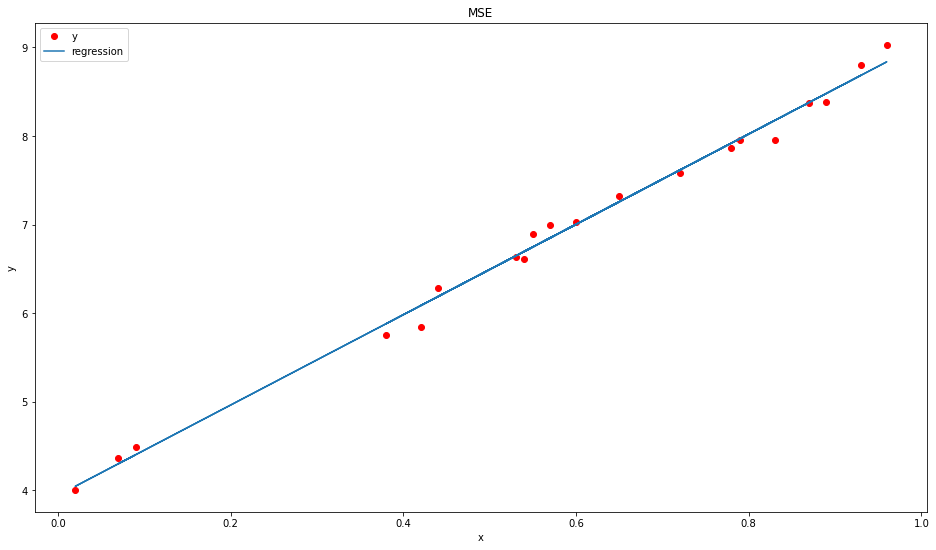

In [13]:
fig1 = plt.figure()
plt.plot(x, y, 'ro',label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MSE')

plt.plot(x,z,label='regression')
plt.legend()
plt.show()

### Part C: Introduction Pandas
In **Part A**, you got to know a method to import `csv`-files using the function `np.genfromtxt`.
At one point or another, we would have to deal with a problem
that is inherent to numpy-arrays, namely that numpy-arrays can only handle one data type at a time.
If we have different kinds of data like booleans, floats, integers or
strings, we have to take a different route.
One possible solution lies in the usage of the package `csv`.
Here, every single row is scanned seperately, and thus can be handled to catch special cases.
Another possibility is to use the package `pandas`, whose complexity is between the other two. It can be imported by

    import pandas as pd

and `csv`-files can be imported by the function `pd.read_csv`.

**Task**: Work through the [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html#min) (this is a link!).

**Task**: Download the file `Auto.csv` from the lecture’s homepage. Import the `csv`-file using the pandas function `read_csv` as a `DataFrame` named `Auto`.
Beware of the missing values in the `csv`-file.
You can use the optional parameter `na_values` from the function `read_csv`.
In this problem, we want to **remove those data sets** that contain missing values.
You should use the method `dropna(axis=0, inplace=True)` for this purpose.

In [14]:
import pandas as pd

Auto = pd.read_csv('Auto.csv', na_values=['?'])

# pd.read_csv?
# Auto.shape
# Auto.sort_values('horsepower')

Auto.dropna(axis=0, inplace=True)

In [15]:
assert Auto.shape == (392,9)
assert Auto.iloc[301,2] == 85
assert np.abs(Auto["mpg"].mean() - 23.445918367346938) < 1e-8

**Task**: Create a short summary of the most important statistics of the data set using the method `describe`.

In [16]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Task**: Create a graphical overview of the distributions of the input variables of the data set using the method `hist`.

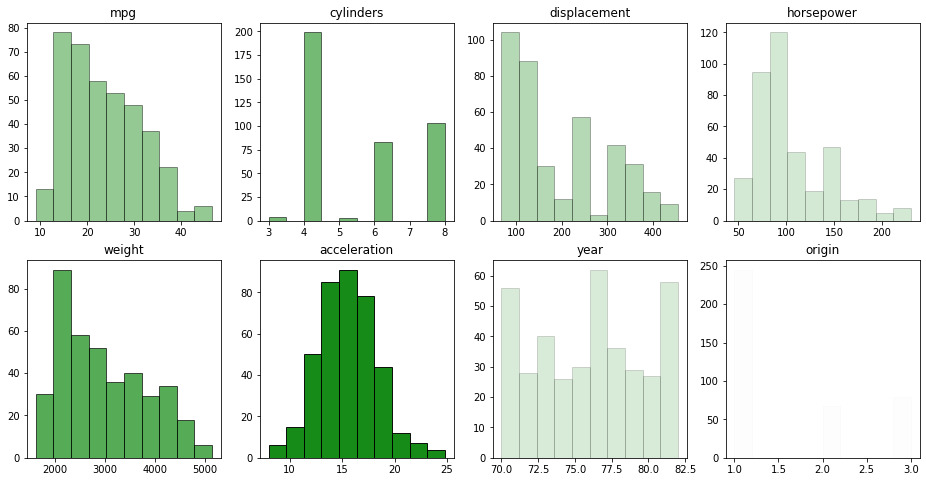

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)

fig, axs = plt.subplots(nrows=2, ncols=4)
cols = Auto.columns
alphas= np.random.rand(8)

for i in range(8):
    axs[int(i/4),i%4].hist(Auto[cols[i]], histtype='bar', alpha=alphas[i], color='g',  ec="k")
    axs[int(i/4),i%4].set_title(cols[i])
plt.show();


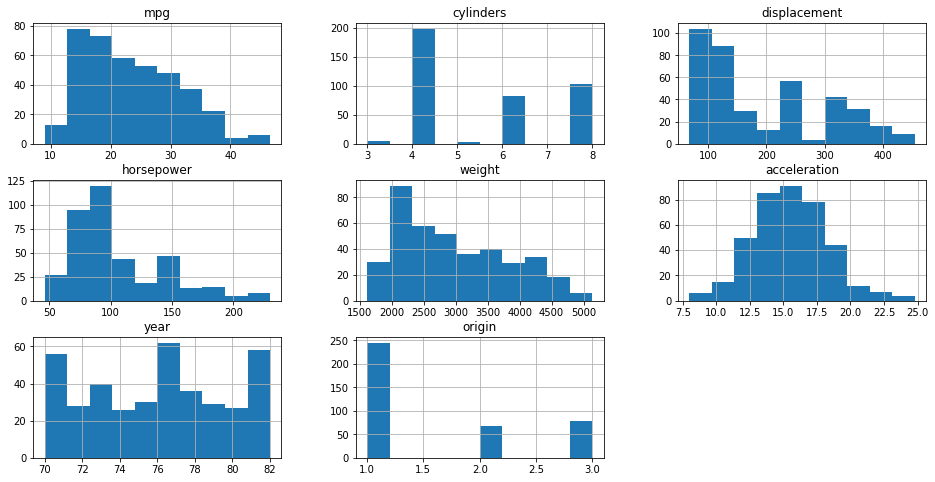

In [18]:
# Also with hist method
Auto.hist();

**Task**: Create a scatter matrix using the function `pd.plotting.scatter_matrix` for the variables `["horsepower", "mpg", "weight"]`.

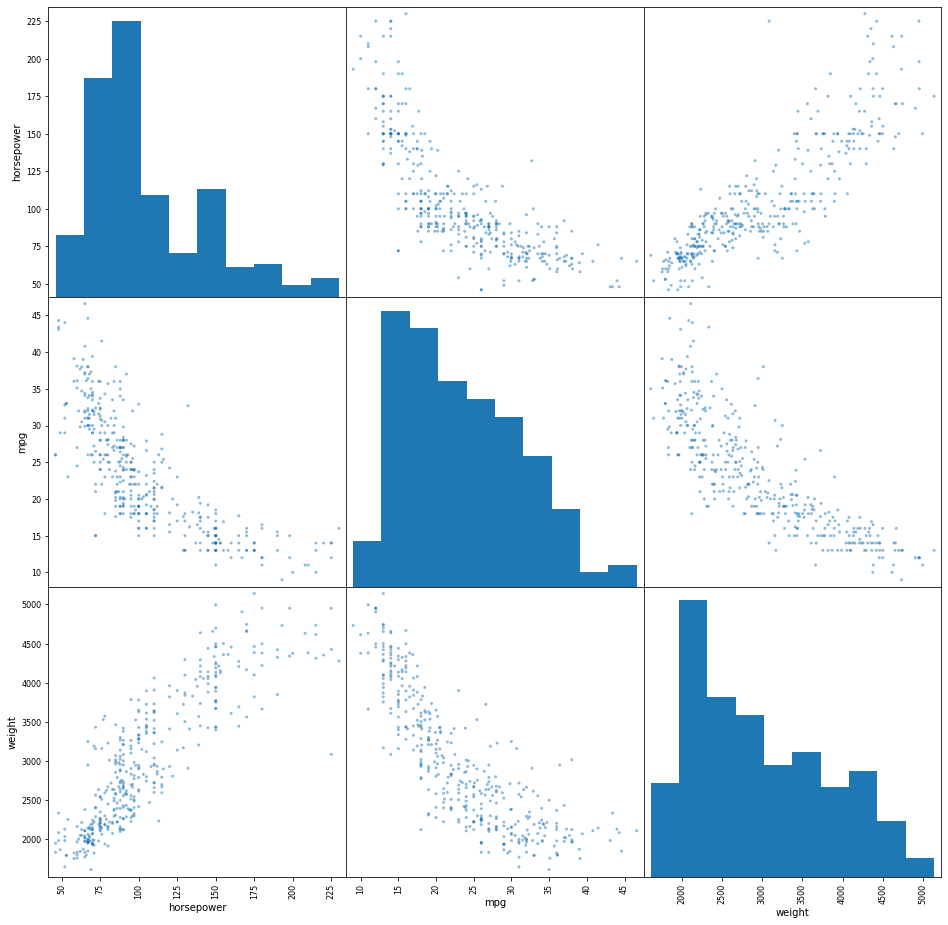

In [19]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 16)

pd.plotting.scatter_matrix(Auto[["horsepower", "mpg", "weight"]]);

Create two figures that relate the variable `"horsepower"` with `"mpg"` and `"weight"`, resp.
Use the possibilities that are provided by pandas.

The following code cell investigates a linear or quadratic connection between horsepower and mpg (miles per gallon).

Investigating mpg against horsepower
MSE for linear fit:  23.943662938603108
MSE for quadratic fit:  18.98476890761722


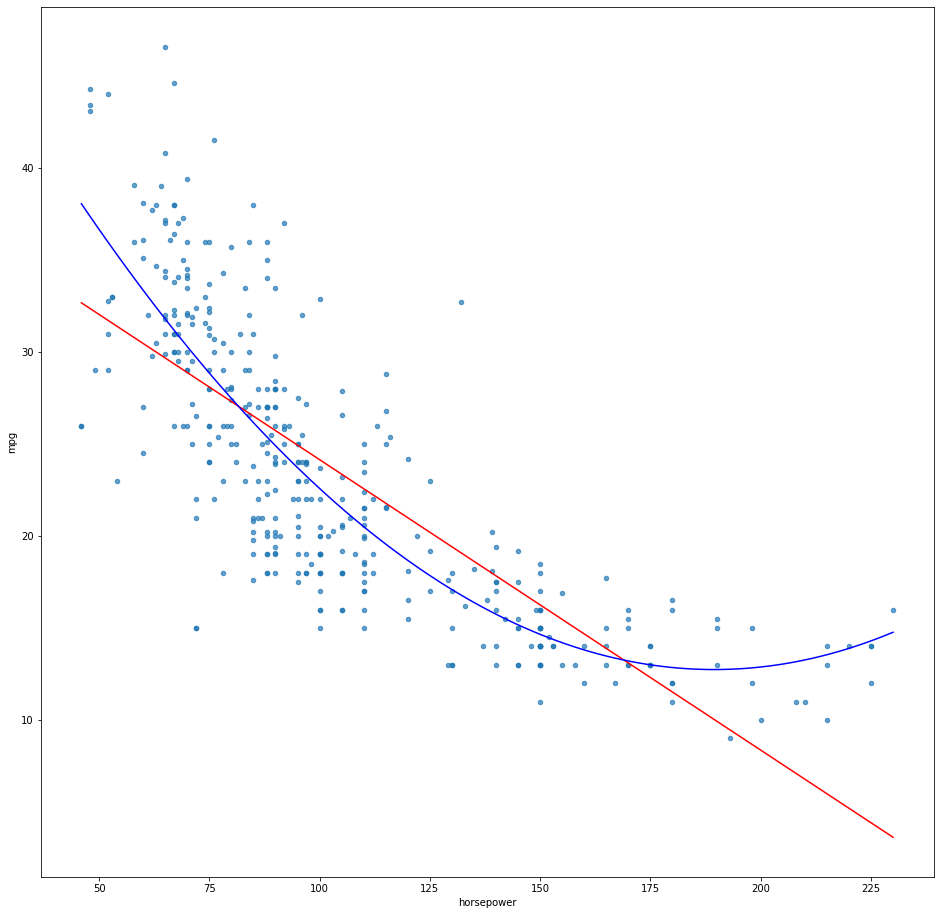

In [20]:
# Investigate linear and quadratic connection between horsepower and mpg
x = Auto.horsepower
y = Auto.mpg

mpgbeta1 = np.polyfit(x,y,deg=1)
mpgbeta2 = np.polyfit(x,y,deg=2)

Auto.plot(x='horsepower', y = 'mpg', marker='o', alpha = .7, kind='scatter')
xr = np.linspace(Auto.horsepower.min(), Auto.horsepower.max(), 100)
plt.plot(xr,np.polyval(mpgbeta1,xr), c='r')
plt.plot(xr,np.polyval(mpgbeta2,xr), c='b')

print('Investigating mpg against horsepower')
print('MSE for linear fit: ', computeMSE(y, np.polyval(mpgbeta1, x)))
print('MSE for quadratic fit: ', computeMSE(y, np.polyval(mpgbeta2, x)))


**Task**: Use the example from above and investigate a possible linear and quadratic relationship between horsepower and weight.

Investigating weight against horsepower
MSE for linear fit:  181763.7708797769
MSE for quadratic fit:  157432.36544399473


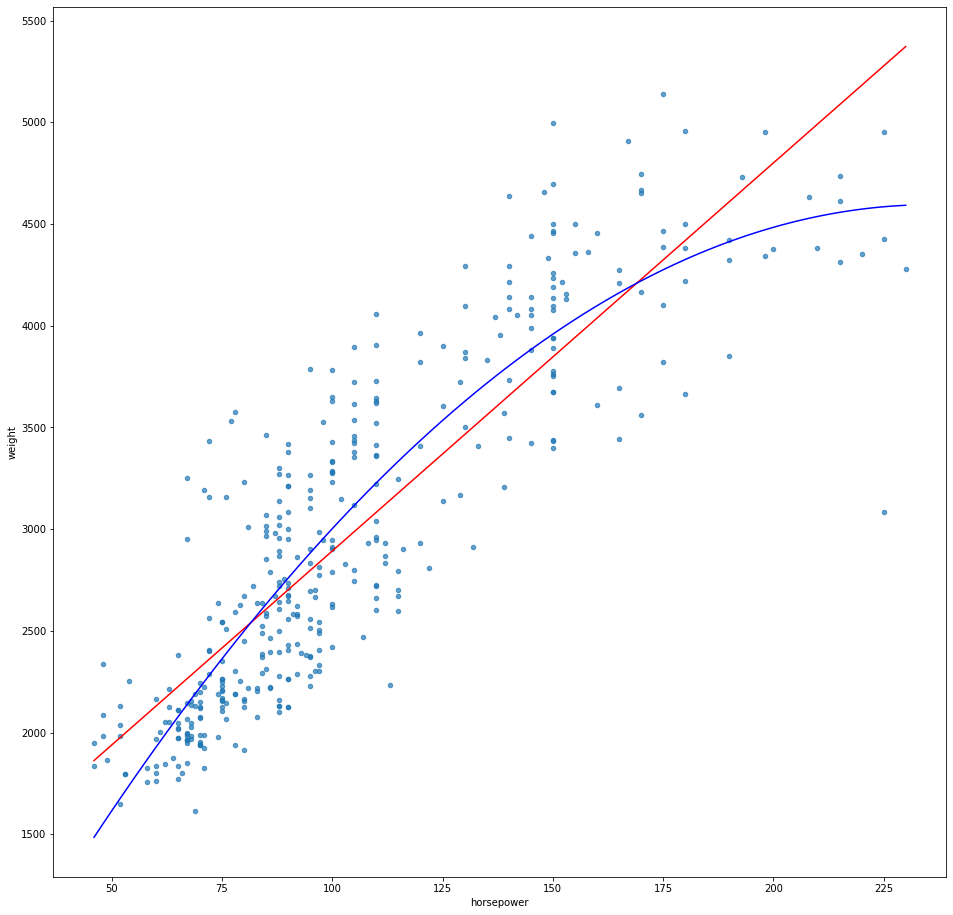

In [21]:
# YOUR CODE HERE
# Investigate linear and quadratic connection between horsepower and weight
x = Auto.horsepower
y = Auto.weight

weightbeta1 = np.polyfit(x,y,deg=1)
weightbeta2 = np.polyfit(x,y,deg=2)

Auto.plot(x='horsepower', y = 'weight', marker='o', alpha = .7, kind='scatter')
xr = np.linspace(Auto.horsepower.min(), Auto.horsepower.max(), 100)
plt.plot(xr,np.polyval(weightbeta1,xr), c='r')
plt.plot(xr,np.polyval(weightbeta2,xr), c='b')

print('Investigating weight against horsepower')
print('MSE for linear fit: ', computeMSE(y, np.polyval(weightbeta1, x)))
print('MSE for quadratic fit: ', computeMSE(y, np.polyval(weightbeta2, x)))